In [24]:
# Import the required packages and functionalities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the require functionalities to split
# the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# To create confusion matrix used to anaylse
# the perfomance of Logistic model
from sklearn.metrics import confusion_matrix

# Read the iris data set into a DataFrame
iris_df = pd.read_csv('Iris.csv')

# preview the DataFrame
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


The independent variables are the characteristics of each flower, that is the petal length and width, the sepal length and width.

In [5]:
# Assign the independent varaibles to X.
# use the iloc() function and extract the 
# columns by the index
X = iris_df.iloc[:,[0,1,2,3]].values
X

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

The dependent variable is given by the column 'Species'.

In [6]:
# Encode the 'Iris-setosa' species as 0
# and both the 'Iris-versicolor' and 'Iris-virginica'
# as 1.

# I will set a condition on the 'Species' column such
# that, if the species name contains the word 'setosa' 
# then the condition will return True and assign the value '0',
# if not then the condition returns False and assign the value '1'.
iris_df['Species'] = np.where(iris_df['Species'].str.contains('setosa'),0,1)


In [9]:
# View the unique values in the 'Species' column

print(iris_df['Species'].unique())

[0 1]


The returned unique values in the Species column are 0 and 1, I have successfully encoded the Species column.

In [11]:
# assign the values in the 'Species' column
# to the dependent variable y
y = iris_df['Species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Split the data into training and test sets

To split the data, use the train_test_split functionality from the Scikit-Learn package. I will use the 75:25 split, of my data 25 % of it will be used to test the regression model and 75% will be used to train the model.

In [13]:
# use the train_test_split function

# set the shuffle parameter to True such that
# the ordered values in 'Species' are equally distributed
# between the training set and test set

# Set stratify equal to y such that there is an equal 
# proportion of '1' and '0' in both the training 
# and test set.

# Set the test_size to 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, stratify=y)

In [15]:
# View the shape of the training and test set
print('Training set: \n', X_train.shape, y_train.shape)
print('Test set: \n', X_test.shape, y_test.shape)

Training set: 
 (112, 4) (112,)
Test set: 
 (38, 4) (38,)


The training set consists of 112 observations and 4 columns. The test set contains 38 observations.

#### Logistic Regression

In [17]:
# Create a model using LogisticRegression() method
log_model = LogisticRegression()


In [18]:
# fit the model with the training set
# using the fit() function
log_model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# predict the dependent variable using the 
# independent variables within the test set.
# use the predict() method from Scikit-learn
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0])

To analyse how the logistic regression model is performing, use a confusion matrix. The confusion matrix is created by using the confusion_matrix() method found in sklearn.metrics package.

In [23]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# display the matrix
print(conf_matrix)

[[13  0]
 [ 0 25]]


The confusion_matrix() method returns an array represents the True Positives, False Positives,False Negatives and True Negative.

The array shows us that we have 38 correct predictions. Observe 13 True Positives, that is to say that the model predicted the correct species as 'Iris-setosa' and 25 True Negatives, that is to say the model correctly predicted that the species was not 'Iris-setosa'. The model is likely to have similar precision and recall. Both False Positive and False Negative are equal to 0. 
Hence the formula for precison and recall will lead to one. 

Text(33.0, 0.5, 'Actual Values')

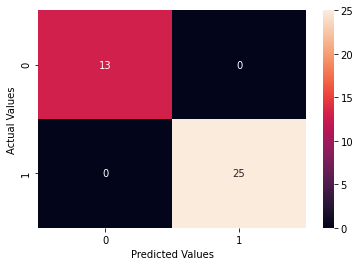

In [28]:
# To plot the confusion matrix 
# use the heatmap() method found in the
# seaborn package
ax = sns.heatmap(data=conf_matrix, annot=True)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

### Evaluation Metrics

In [48]:
# Assign the indexes of the confusion matrix
# to TP, FP, FN and TN
TP = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TN = conf_matrix[1][1]

print(TP, FP, FN, TN)

13 0 0 25


In [51]:
# calculate the accuracy, precision and recall
# of the model using the 
# values obtained from the confusion matrix
accuracy = (TP + TN)/(TP+FN+TN+FP)
print('The accuracy of the model is: ', accuracy)

precision = TP/(TP+FP)
print('The precision of the model is: ', precision)

recall = TP/(TP+FN)
print('The recall of the model is: ', recall)

The accuracy of the model is:  1.0
The precision of the model is:  1.0
The recall of the model is:  1.0


The values for both recall and precision is 1 as predicted above.

### Bibliography

1. Enconding Catergorical Data using Python - https://pbpython.com/categorical-encoding.html


2. Compute a Confusion Matrix 
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

    - https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/


3. Plot a Confusion Matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html